**Servo Prediction using Linear Regression**

In control Engg a servomechanism, usually shortened to servo, is an automatic device that error-sensing negative feedback mechanism to ensure the action of a mechanism.

Import Libraries

In [ ]:
import pandas as pd
import numpy as np

Import CSV as df(DataFrame)

In [ ]:
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Servo%20Mechanism.csv')

Get the first 5 rows of df

In [ ]:
df.head()

,Motor,Screw,Pgain,Vgain,Class
0,E,E,5,4,4
1,B,D,6,5,11
2,D,D,4,3,6
3,B,A,3,2,48
4,D,B,6,5,6


Get Information of df

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motor   167 non-null    object
 1   Screw   167 non-null    object
 2   Pgain   167 non-null    int64 
 3   Vgain   167 non-null    int64 
 4   Class   167 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.6+ KB


Get the summary statistics

In [ ]:
df.describe()

,Pgain,Vgain,Class
count,167.000000,167.000000,167.000000
mean,4.155689,2.538922,21.173653
std,1.017770,1.369850,13.908038
min,3.000000,1.000000,1.000000
25%,3.000000,1.000000,10.500000
50%,4.000000,2.000000,18.000000
75%,5.000000,4.000000,33.500000
max,6.000000,5.000000,51.000000


Get Column names

In [ ]:
df.columns

Index(['Motor', 'Screw', 'Pgain', 'Vgain', 'Class'], dtype='object')

Get shape of df

In [ ]:
df.shape

(167, 5)

Get Categories & counts of categorical variables

In [ ]:
df[['Motor']].value_counts()

Motor
C        40
A        36
B        36
E        33
D        22
dtype: int64

In [ ]:
df[['Screw']].value_counts()

Screw
A        42
B        35
C        31
D        30
E        29
dtype: int64

Get Encoding of categorical features

In [ ]:
df.replace({'Motor' : {'A : 0', 'B : 1', 'C : 2', 'D : 3', 'E : 4'}}, inplace=True)

In [ ]:
df.replace({'Screw' : {'A : 0', 'B : 1', 'C : 2', 'D : 3', 'E : 4'}}, inplace=True)

Define y (dependent or label or target variable) & X (independent or features or attribute variable)

In [ ]:
y = df['Class']

In [ ]:
y.shape 

(167,)

In [ ]:
y

0       4
1      11
2       6
3      48
4       6
       ..
162    44
163    40
164    25
165    44
166    20
Name: Class, Length: 167, dtype: int64

In [ ]:
X = df[['Pgain', 'Vgain']]

or use .drop function to define X

In [ ]:
X = df.drop('Class', axis=1)

In [ ]:
X.shape

(167, 4)

In [ ]:
X

,Motor,Screw,Pgain,Vgain
0,E,E,5,4
1,B,D,6,5
2,D,D,4,3
3,B,A,3,2
4,D,B,6,5
...,...,...,...,...
162,B,C,3,2
163,B,E,3,1
164,C,D,4,3
165,A,B,3,2


Get Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=2529)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((125, 2), (42, 2), (125,), (42,))

Get Model Train

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

Get Model Prediction

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred.shape

(42,)

In [ ]:
y_pred

array([34.42758431, 29.94852435, 15.79961723, 16.15548085, 34.42758431,
       25.11360077, 15.79961723, 20.63454081, 34.42758431, 34.42758431,
       15.79961723, 20.63454081, 15.79961723, 16.15548085, 20.63454081,
       16.15548085,  6.48563369, 34.42758431, 34.42758431, -2.47248623,
       29.94852435, 34.42758431, 34.42758431, 29.94852435, 16.15548085,
        6.48563369, 25.11360077, 20.63454081, 20.63454081,  6.48563369,
       25.11360077, 25.11360077, 34.42758431, 29.94852435, 16.15548085,
        6.48563369, 16.15548085, 29.94852435, 16.15548085, 34.42758431,
       34.42758431, 20.63454081])

Get Model Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
mean_squared_error(y_test, y_pred)

68.1772956666344

In [ ]:
mean_absolute_error(y_test, y_pred)

6.962629009500424

In [ ]:
r2_score(y_test, y_pred)

0.6676447273060468

Get Visualization of Actual Vs Predicted Results

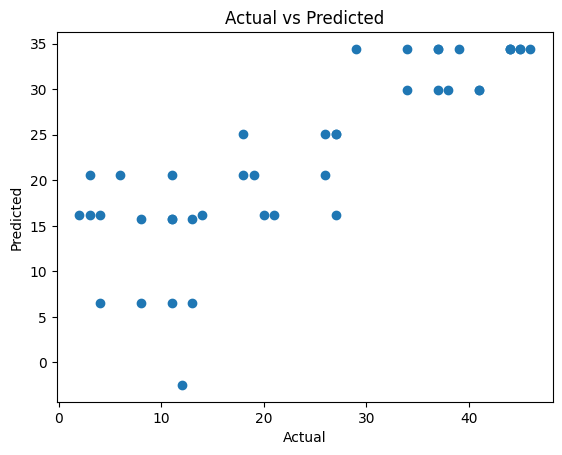

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

Explanation


The Servo dataset contains data on a servo motor system, and the task is to predict the response time of the system based on the given features.

The dataset consists of four features (input variables) and one target variable (response time). The input variables are as follows:

Motor: The type of motor (A, B, C, D, E).

Screw: The type of screw (A, B, C, D, E).

Pgain: The proportional gain of the motor (continuous value).

Vgain: The velocity gain of the motor (continuous value).

The target variable is:
Class: The response time of the servo system (continuous value).